# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [ ]:
import pandas as pd
import numpy as np

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [ ]:
#pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000)
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000,
                na_values=[0, "NA", "UNKNOWN"])
df.head()

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [327]:
df.shape


(30000, 17)

In [328]:
#df.columns.replace('Primary Breed','primary_breed')
df.columns = df.columns.str.replace(' ','_')
#https://www.codegrepper.com/code-examples/python/pandas+remove+spaces+in+the+column+names
df.columns

Index(['Owner_Zip_Code', 'Animal_Name', 'Animal_Gender', 'Primary_Breed',
       'Secondary_Breed', 'Animal_Dominant_Color', 'Animal_Secondary_Color',
       'Animal_Third_Color', 'Animal_Birth', 'Spayed_or_Neut',
       'Guard_or_Trained', 'Vaccinated', 'Application_Date',
       'License_Issued_Date', 'License_Expired_Date', 'Birth_Year', 'Age'],
      dtype='object')

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [329]:
#Each row in the dataset is animal with a New York license in NYC
# Primay Breed is the main breed of the animal. Some animals will only have a Primary Breed (and no Secondary Breed)
    # and others will have no Primary Breed listed at all. 
# Application Date is a timestamp of when the animal's owner applied for the animals NYC license

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [330]:
# What is the most common breed of animal in the NYC Animal License dataset? What is the most common animal name?
# On average, how long did it take NYC to issue licenses to each of these animals' owners? 
# How many licensed animals in NYC are trained? 
# What is the most common breed of animal that is not spayed or neutered?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:title={'center':'Most popular breed of dogs'}>

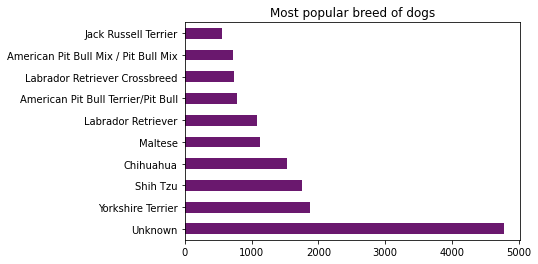

In [331]:
df.Primary_Breed.value_counts(ascending=False).head(10).plot.barh(x='Primary_Breed',
                                                                  title ='Most popular breed of dogs', color='#6A186E')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [332]:
no_unknown_breed = df.Primary_Breed.replace({
   'Unknown': np.nan
})

no_unknown_breed.value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary_Breed, dtype: int64

<AxesSubplot:title={'center':'Most popular breed of dogs, without Unknown'}>

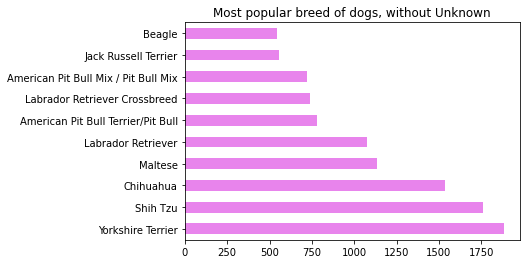

In [333]:
no_unknown_breed.value_counts(ascending=False).head(10).plot.barh(x='Primary_Breed',
                                                                  title ='Most popular breed of dogs, without Unknown', color='#E884EC')

## What are the most popular dog names?

In [334]:
df.Animal_Name.value_counts(ascending=False).head(10)

Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Name: Animal_Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [335]:
print(f'377 dogs have the name Max')
df.Animal_Name.str.contains('Max').value_counts()


377 dogs have the name Max


False    29359
True       377
Name: Animal_Name, dtype: int64

In [336]:
print(f'20 dogs have the name Maxwell')
df.Animal_Name.str.contains('Maxwell').value_counts()


20 dogs have the name Maxwell


False    29716
True        20
Name: Animal_Name, dtype: int64

In [337]:
print(f'14 dogs have the name Jessie, yay!')
df.Animal_Name.str.contains('Jessie').value_counts()


14 dogs have the name Jessie, yay!


False    29722
True        14
Name: Animal_Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [339]:
df.Guard_or_Trained.value_counts(dropna=True).sum()


30000

In [310]:
(df.Guard_or_Trained.value_counts(dropna=True) / df.Guard_or_Trained.value_counts(dropna=True).sum())*100

No     99.914254
Yes     0.085746
Name: Guard_or_Trained, dtype: float64

In [340]:
# of animals where training is indicated one way or another, 
    # less than 0.1% of animals are trained

## What are the actual numbers?

In [341]:
df.Guard_or_Trained.value_counts(dropna=True)

No     29983
Yes       17
Name: Guard_or_Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [342]:
df.Guard_or_Trained.value_counts(dropna=False)

No     29983
Yes       17
Name: Guard_or_Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [343]:
df.Guard_or_Trained = df.Guard_or_Trained.replace({
   np.NaN : "No"
})

df.Guard_or_Trained.value_counts(dropna=False)

No     29983
Yes       17
Name: Guard_or_Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [344]:
# df.groupby(by='Primary_Breed')
# df.groupby(by='Primary_Breed').Guard_or_Trained.value_counts(ascending=False).head()
# df.loc[df['Guard_or_Trained'].str.contains('Yes'), 'Gaurd_Dogs'] = 'value if condition is met'
# df.groupby(by='Gaurd_Dogs').Primary_Breed.value_counts.head()
no_unknown_breed[(df.Guard_or_Trained == 'Yes')].value_counts()



German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary_Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [345]:
df['Birth_Year'] = df['Animal_Birth'].apply(lambda birth: birth.year)
df.Birth_Year

0        2007
1        2013
2        2014
3        2008
4        2014
         ... 
29995    2010
29996    2010
29997    2014
29998    2009
29999    2012
Name: Birth_Year, Length: 30000, dtype: int64

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [346]:
df['Age'] = 2021 - df['Birth_Year']
df.Age.mean()

11.712433333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [347]:
zips = pd.read_csv('zipcodes-neighborhoods.csv', na_values=[0, "NA", "UNKNOWN"])
zips.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [348]:
merged = df.merge(zips, left_on='Owner_Zip_Code', right_on='zip')
merged.head()
#originally tried this in reverse (left_on='zip'), but it didn't work. 
#I'm confused as to why? 

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Birth_Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,10,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,10,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,14,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [349]:
merged.Animal_Name[merged.borough == 'Bronx'].value_counts().head(5)

Bella       22
Max         21
Rocky       20
Unknown     16
Princess    15
Name: Animal_Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [350]:
merged.groupby(by='neighborhood').Primary_Breed.value_counts()

neighborhood  Primary_Breed              
Borough Park  Unknown                        108
              Yorkshire Terrier               49
              Maltese                         34
              Shih Tzu                        34
              Chihuahua                       32
                                            ... 
West Queens   Soft Coated Wheaten Terrier      1
              Tibetan Spaniel                  1
              Toy Fox Terrier                  1
              Weimaraner                       1
              Wire Fox Terrier                 1
Name: Primary_Breed, Length: 4029, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [351]:
merged.Spayed_or_Neut.value_counts(dropna=True)

Yes    24300
No      5273
Name: Spayed_or_Neut, dtype: int64

In [352]:
#merged.Animal_Name[merged.borough == 'Bronx'].value_counts().head(5)
merged.Primary_Breed[merged.Spayed_or_Neut == 'No'].value_counts().head()
#not sure why the unknows came back or how??

Yorkshire Terrier    531
Unknown              416
Shih Tzu             401
Chihuahua            303
Maltese              300
Name: Primary_Breed, dtype: int64

In [353]:
merged.Animal_Gender.value_counts(dropna=True)
#We could throw away the 3 blanks, but since 3 animals won't make too much of a difference to answering this Q, I'm leaving them in!

M    16020
F    13550
         3
Name: Animal_Gender, dtype: int64

In [354]:
merged.Animal_Gender[merged.Spayed_or_Neut == 'No'].value_counts()
#Females are more likely to be spayed than males

M    3343
F    1930
Name: Animal_Gender, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [ ]:
# I can't figure out how exactly to do this question! 

In [355]:
merged['Monochrome'] = merged.Animal_Dominant_Color.str.contains('Black', 'White', 'Grey')
# merged[merged.Label.str.contains("CHRISTMAS")].Label.value_counts()
# df[df.Other_Race.str.contains("^H[IY]SS?P", na=False)] \
#     .Other_Race \
#     .value_counts()

TypeError: unsupported operand type(s) for &: 'str' and 'int'

## How many dogs are in each borough? Plot it in a graph.

In [356]:
boro_dog_count = merged.borough.value_counts(dropna=True)
boro_dog_count

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

<AxesSubplot:title={'center':'Dog Count By Borough'}>

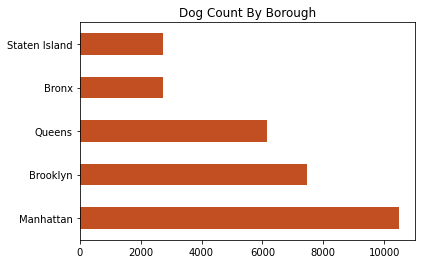

In [357]:
merged.borough.value_counts().plot(x='Borough', title ='Dog Count By Borough', color='#C14F21', kind='barh')


## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [358]:
boro_pop = pd.read_csv('boro_population.csv')
boro_pop.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [359]:
second_merge = merged.merge(boro_pop, left_on='borough', right_on='borough')
second_merge.head()
#now we need number of dogs per boro and pop per boro


,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,...,Application_Date,License_Issued_Date,License_Expired_Date,Birth_Year,Age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,10024,Manhattan,1644518,23
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,...,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,10024,Manhattan,1644518,23
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,10,Upper West Side,10024,Manhattan,1644518,23
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,10,Upper West Side,10024,Manhattan,1644518,23
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,14,Upper West Side,10024,Manhattan,1644518,23


In [360]:
pop_series = second_merge.groupby(by='borough').population.mean()
pop_series.sort_index()

borough
Bronx            1455444.0
Brooklyn         2636735.0
Manhattan        1644518.0
Queens           2339150.0
Staten Island     474558.0
Name: population, dtype: float64

In [361]:
boro_dog_count = merged.borough.value_counts(dropna=True)
boro_dog_count.sort_index()

Bronx             2748
Brooklyn          7466
Manhattan        10478
Queens            6154
Staten Island     2727
Name: borough, dtype: int64

In [362]:
# I want to 'join' each of the above series 
# so that i can divide dog count by pop 
# or...i wonder if i could create a for-loop here? and put each of these series into a list? 


# series_a = pd.Series([pop_series], name="pop")
# series_b = pd.Series([boro_dog_count], name="dog")

# df2 = pd.concat([series_a, series_b], axis=1)
# #https://www.kite.com/python/answers/how-to-merge-two-pandas-series-into-a-dataframe-in-python
# df2

In [363]:
pop_series = second_merge.groupby(by='borough').population.mean()
pop_series.sort_index()
pop_series = pop_series.sort_index()

pop_list = []
for pop in pop_series: 
    #print("it works!")
    #omg!
    pop_list.append(pop)
print(pop_series)
pop_list


borough
Bronx            1455444.0
Brooklyn         2636735.0
Manhattan        1644518.0
Queens           2339150.0
Staten Island     474558.0
Name: population, dtype: float64


[1455444.0, 2636735.0, 1644518.0, 2339150.0, 474558.0]

In [364]:
boro_dog_count = merged.borough.value_counts(dropna=True)
boro_dog_count.sort_index()
boro_dog_count = boro_dog_count.sort_index()

dog_count_list = []
for count in boro_dog_count: 
    dog_count_list.append(count)
print(boro_dog_count)
dog_count_list


Bronx             2748
Brooklyn          7466
Manhattan        10478
Queens            6154
Staten Island     2727
Name: borough, dtype: int64


[2748, 7466, 10478, 6154, 2727]

In [365]:
#products = [a * b for a, b in zip(list1, list2)]
dog_count_list
pop_list

dogs_per_capita = [a / b for a, b in zip(dog_count_list, pop_list)]
dogs_per_capita
#https://www.kite.com/python/answers/how-to-multiply-two-lists-in-python#:~:text=Use%20zip()%20to%20multiply,them%20to%20a%20new%20list.

[0.0018880836363336549,
 0.002831532179001682,
 0.006371471762546837,
 0.002630870187888763,
 0.005746399807821173]

In [366]:
print(f'Manhattan has the highest number of dogs per capita!!')

Manhattan has the highest number of dogs per capita!!


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [372]:
#dogs_per_capita[2]

0.006371471762546837

## What percentage of dogs are not guard dogs?

In [373]:
(df.Guard_or_Trained.value_counts(dropna=True) / df.Guard_or_Trained.value_counts(dropna=True).sum())*100

No     99.943333
Yes     0.056667
Name: Guard_or_Trained, dtype: float64

In [ ]:
#99.9% of dogs are not gaurd dogs! 